In [39]:
# import pandas library
import pandas as pd

# Get the data
column_names = ['user_id', 'item_id', 'rating', 'timestamp']

path = '/file (1).tsv'

df = pd.read_csv(path, sep='\t', names=column_names)

# Check the head of the data
df.head()



,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [40]:
df.head()


# Check out all the movies and their respective IDs
movie_titles = pd.read_csv('/Movie_Id_Titles.csv')
movie_titles.head()

data = pd.merge(df, movie_titles, on='item_id')
data.head()


,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [41]:
data.groupby('title')['rating'].mean().sort_values(ascending=False).head()



# Calculate count rating of all movies
data.groupby('title')['rating'].count().sort_values(ascending=False).head()

# creating dataframe with 'rating' count values
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())

ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())

ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<Axes: >

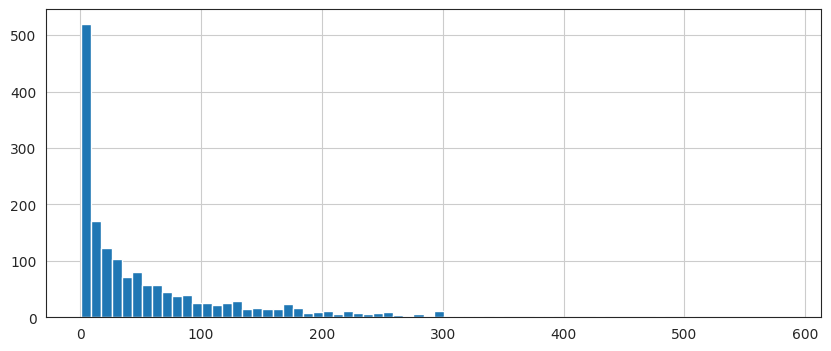

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')



# plot graph of 'num of ratings column'
plt.figure(figsize =(10, 4))

ratings['num of ratings'].hist(bins = 70)


In [45]:
moviemat = data.pivot_table(index ='user_id',
              columns ='title', values ='rating')

moviemat.head()

ratings.sort_values('num of ratings', ascending = False).head(10)


# analysing correlation with similar movies
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']

starwars_user_ratings.head()


# analysing correlation with similar movies
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

corr_starwars = pd.DataFrame(similar_to_starwars, columns =['Correlation'])
corr_starwars.dropna(inplace = True)

corr_starwars.head()


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [44]:
corr_starwars.sort_values('Correlation', ascending = False).head(10)
corr_starwars = corr_starwars.join(ratings['num of ratings'])

corr_starwars.head()

corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation', ascending = False).head()



# Similar movies as of liarliar
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns =['Correlation'])
corr_liarliar.dropna(inplace = True)

corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation', ascending = False).head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
